# revisit Michael's code for croco and with pands and xarray tools

In [1]:
from matplotlib import pyplot as plt

%matplotlib inline

import crocosi.postp as pp
import dask.dataframe as dd
import pandas as pd

import hvplot.pandas
import hvplot.dask

from glob import glob

In [2]:
from dask.distributed import Client
client = Client()  # set up local cluster on your laptop
client

Client Scheduler: tcp://127.0.0.1:49928 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 8.59 GB


---

## single run

In [3]:
root_path = '/Users/zcaspar/'
#run = 'jet_cfg1_wp9_4km_0a2000j/'
run = 'jet_cfg1_wp75_4km_1500a2000j_floats_lev50_itide/'
#file='t1/file_his_00010101-00010125.nc'
#File='t1'
gparams = {'f0': 1.0313e-4, 'beta': 1.6186e-11}
r = pp.CROCOrun(root_path+run, prefix='file_', open_nc=['his'], grid_params=gparams)

In [53]:
r['his'].time

<xarray.DataArray 'time' (time: 20)>
array([1512.5, 1537.5, 1562.5, 1587.5, 1612.5, 1637.5, 1662.5, 1687.5, 1712.5,
       1737.5, 1762.5, 1787.5, 1812.5, 1837.5, 1862.5, 1887.5, 1912.5, 1937.5,
       1962.5, 1987.5])
Coordinates:
    time_instant  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time          (time) float64 1.512e+03 1.538e+03 ... 1.962e+03 1.988e+03

In [5]:
path_data='/Users/zcaspar/jet_cfg1_wp75_4km_1500a2000j_floats_lev50_itide/'
df = dd.read_csv(glob(path_data+'t1/float.????'), 
                 names=['id','time','xgrid','ygrid','zgrid','depth','temp','X1','X2','X3','X4','X5'],
                 delim_whitespace=True).persist()

In [13]:
ldf = df.groupby(['id']).get_group(102).compute().sort_values('time').set_index('time')

In [52]:
LDF = df.groupby('time').get_group(1537.5).compute().sort_values('id').set_index('id')

In [54]:
test = df.groupby('time').get_group(1587.5).compute().sort_values('id').set_index('id')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x121f35710>,
      dtype=object)

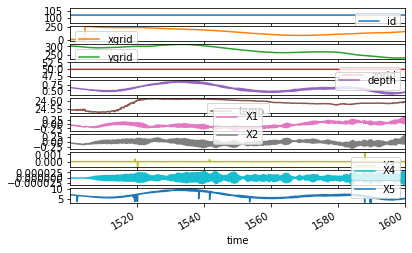

In [6]:
ldf.plot(subplots=True)

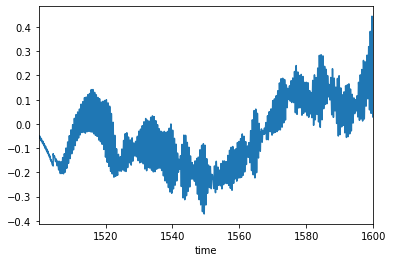

In [7]:
ldf['X1'].plot()

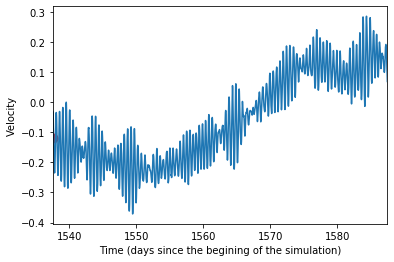

In [108]:
ldf['X1'].loc[1537.5:1587.5].plot()
plt.scatter(1537.5,-0.12,c='r',s=80)
plt.xlabel('Time (days since the begining of the simulation)')
plt.ylabel('Velocity')
plt.savefig('Velocity.png')

In [46]:
ldf.loc[1520:1600]

,id,xgrid,ygrid,zgrid,depth,temp,X1,X2,X3,X4,X5
time,,,,,,,,,,,
1520.0000,102,232.94857,300.44096,50.0,0.635193,24.606252,-0.136491,-0.001884,-3.386064e-06,0.000023,3.979994
1520.0069,102,232.92784,300.43976,50.0,0.637030,24.606604,-0.136963,0.011412,-1.917049e-06,0.000024,3.998929
1520.0139,102,232.90705,300.44056,50.0,0.638912,24.606917,-0.136440,0.024780,-4.054656e-07,0.000024,4.003755
1520.0208,102,232.88635,300.44337,50.0,0.640812,24.607191,-0.134917,0.038116,1.131682e-06,0.000024,3.994212
1520.0278,102,232.86588,300.44816,50.0,0.642711,24.607426,-0.132397,0.051319,2.679654e-06,0.000024,3.970219
...,...,...,...,...,...,...,...,...,...,...,...
1599.9722,102,157.17546,230.52741,50.0,0.401587,24.595699,0.284746,0.346572,3.129804e-05,-0.000007,4.815130
1599.9792,102,157.21944,230.58060,50.0,0.401484,24.595572,0.305253,0.342259,3.023426e-05,-0.000011,4.814117
1599.9861,102,157.26624,230.63265,50.0,0.401860,24.595381,0.324872,0.335437,2.876528e-05,-0.000015,4.817801


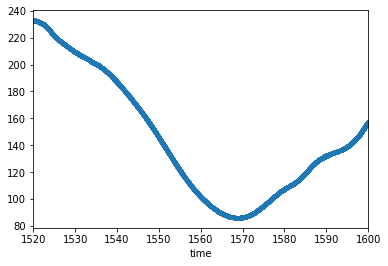

In [48]:
ldf.loc[1520:1600]['xgrid'].plot(marker='.')

In [51]:
r['his'].time

<xarray.DataArray 'time' (time: 20)>
array([1512.5, 1537.5, 1562.5, 1587.5, 1612.5, 1637.5, 1662.5, 1687.5, 1712.5,
       1737.5, 1762.5, 1787.5, 1812.5, 1837.5, 1862.5, 1887.5, 1912.5, 1937.5,
       1962.5, 1987.5])
Coordinates:
    time_instant  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time          (time) float64 1.512e+03 1.538e+03 ... 1.962e+03 1.988e+03

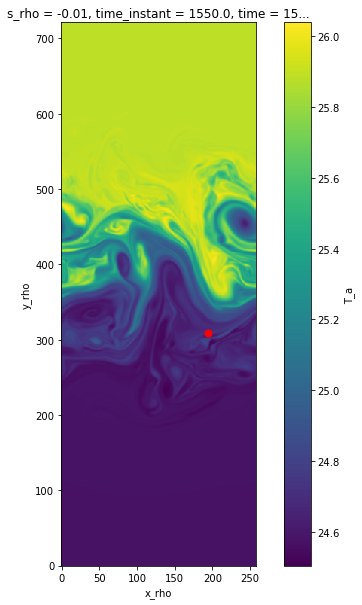

In [65]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
r['his'].T_a.isel(s_rho=-1).sel(time=1537.5,method='nearest').plot(ax=ax)
ax.scatter(ldf.loc[1537.5]['xgrid'],ldf.loc[1537.5]['ygrid'],c='r',s=50)
ax.set_aspect('equal')

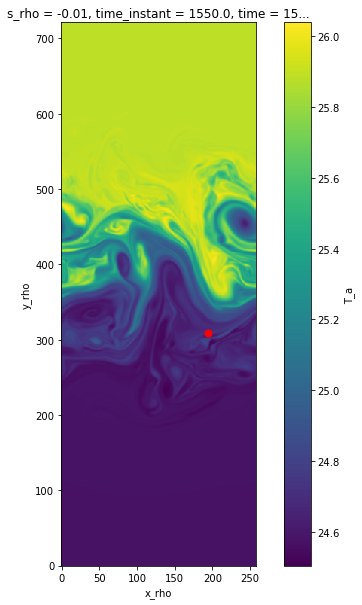

In [98]:
# chunking is not appropriate for inst
# one should be able to pass an option to CROCOrun in order to control chunks
#r['his'].u_a.isel(y_rho=350).plot(xlim=[2000,2050])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
cs = r['his'].T_a.isel(s_rho=-1).sel(time=1537.5,method='nearest').plot(ax=ax)
ax.scatter(ldf.loc[1537.5]['xgrid'],ldf.loc[1537.5]['ygrid'],c='r',s=50)
ax.set_aspect('equal')
plt.savefig('Fig1.png')
#fig.colorbar(cs,ax=ax, shrink=0.6);fig.colorbar(cs1,ax=ax1, shrink=0.6)


/opt/anaconda3/envs/croco/lib/python3.7/site-packages/matplotlib/mathtext.py:2542: SyntaxWarning: Exception creating Regex for oneOf, building MatchFirst
  p.subsuperop    <<= oneOf(["_", "^"])


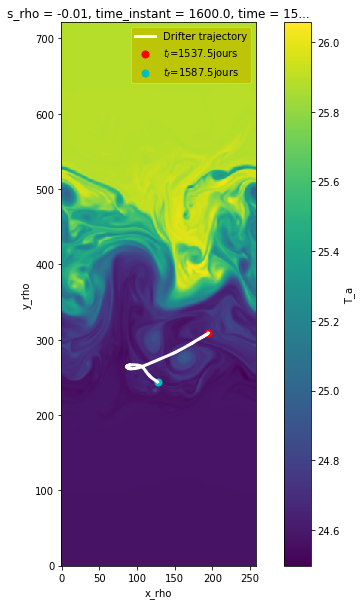

In [112]:
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(1,1,1)
cs1 = r['his'].T_a.isel(s_rho=-1).sel(time=1587.5,method='nearest').plot(ax=ax1)
ax1.plot(ldf.loc[1537.5:1587.5]['xgrid'],ldf.loc[1537.5:1587.5]['ygrid'],c='w',linewidth=3, label='Drifter trajectory')
ax1.scatter(ldf.loc[1537.5]['xgrid'],ldf.loc[1537.5]['ygrid'],c='r',s=50,label=r"$t_i$=%sjours"%1537.5)
ax1.scatter(ldf.loc[1587.5]['xgrid'],ldf.loc[1587.5]['ygrid'],c='c',s=50,label=r"$t_f$=%sjours"%1587.5)
ax1.set_aspect('equal')
ax1.legend(facecolor='y')
plt.savefig('Fig2.png')

In [ ]:
r['his'].T_a.plot

In [ ]:
r['his'].plot

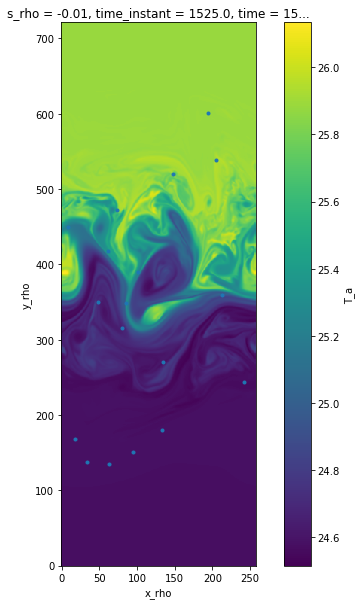

In [50]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
r['his'].T_a.isel(s_rho=-1).sel(time=1520,method='nearest').plot(ax=ax)
ax.scatter(LDF['xgrid'][0::500],LDF['ygrid'][0::500],marker='.')
ax.set_aspect('equal')

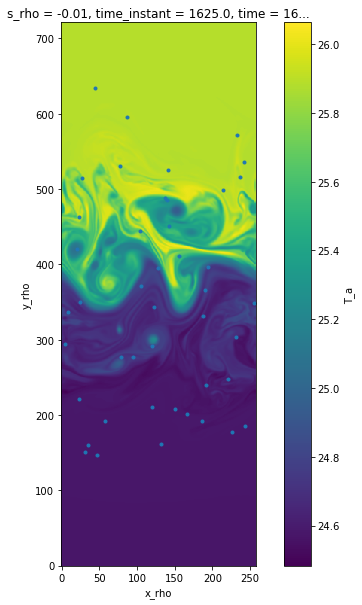

In [39]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
r['his'].T_a.isel(s_rho=-1).sel(time=1600,method='nearest').plot(ax=ax)
ax.scatter(test['xgrid'][0::200],test['ygrid'][0::200],marker='.')
ax.set_aspect('equal')

In [36]:
LDF.xgrid[0::500]

id
2         4.827360
504      49.111670
1005     12.892066
1507     44.501346
2008    197.801600
2515    159.968630
3020     66.704516
3533    104.715030
4037    123.992780
4541     60.015993
5051    188.653560
5554    146.517080
6067     94.144950
6576    224.627430
7086    104.057490
7599    202.552110
8107    228.472410
8621    207.834770
Name: xgrid, dtype: float64

In [26]:
ldf['xgrid'][:100]

Series([], Name: xgrid, dtype: float64)

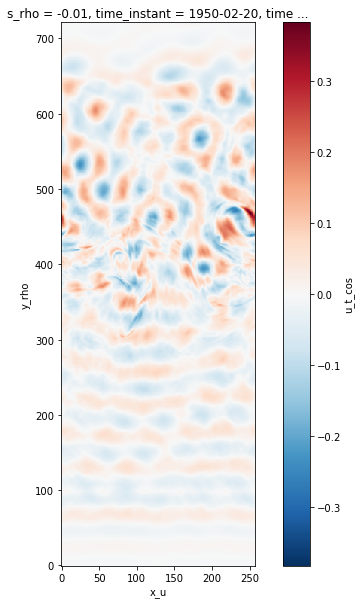

In [34]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
r['his'].u_t_cos.isel(s_rho=-1,time=1).plot(ax=ax)
ax.set_aspect('equal')

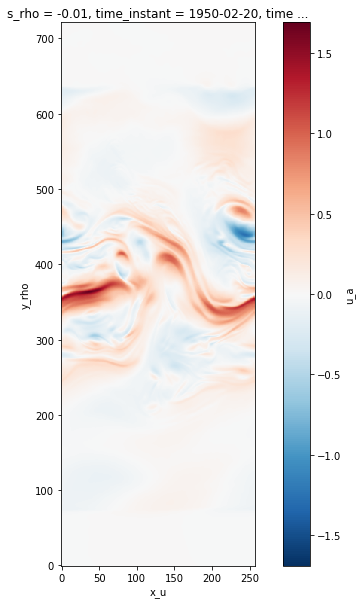

In [35]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
r['his'].u_a.isel(s_rho=-1,time=1).plot(ax=ax)
ax.set_aspect('equal')

In [51]:
#r['his'].u_a.isel(x_u=125).plot(x='time', y='eta_u')
t=r['his'].time_instant
print(t)

<xarray.DataArray 'time_instant' (time: 20)>
dask.array<concatenate, shape=(20,), dtype=datetime64[ns], chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    time_instant  (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time          (time) float64 1.5e+03 nan nan nan nan ... nan nan nan nan nan
Attributes:
    standard_name:  time
    long_name:      Time axis
    time_origin:    1950-01-01 00:00:00
    bounds:         time_instant_bounds


In [55]:
r['his'].ssh_a.isel(x_rho=125).coords

Coordinates:
    xi_w          (y_rho) float32 dask.array<chunksize=(722,), meta=np.ndarray>
    xi_rho        (y_rho) float32 dask.array<chunksize=(722,), meta=np.ndarray>
    eta_w         (y_rho) float32 dask.array<chunksize=(722,), meta=np.ndarray>
    eta_rho       (y_rho) float32 dask.array<chunksize=(722,), meta=np.ndarray>
    time_instant  (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time          (time) float64 1.5e+03 nan nan nan nan ... nan nan nan nan nan
    f             (y_rho) float32 dask.array<chunksize=(722,), meta=np.ndarray>

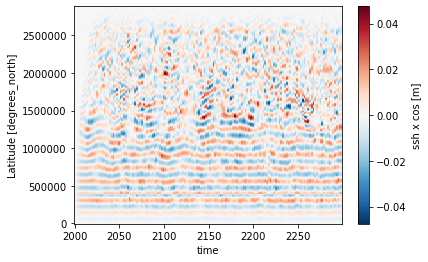

In [7]:
r['ave'].ssh_t_cos.isel(x_rho=125).plot(x='time', y='eta_rho')

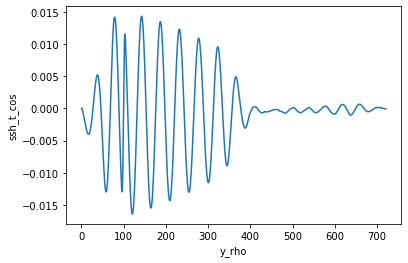

In [56]:
r['his'].ssh_t_cos.mean(['time','x_rho']).plot()

---

## logged statistics

In [57]:
r.stats.head()

,STEP,KINETIC_ENRG,POTEN_ENRG,TOTAL_ENRG,NET_VOLUME,trd,ENSTROPHY,BTKIN_ENRG
time[DAYS],,,,,,,,
1500.00000,432000.0,0.012444,531.16820,531.18064,1.179650e+16,0.0,5.985666e-19,0.011175
1500.03472,432010.0,0.012444,531.16819,531.18064,1.179650e+16,0.0,5.984934e-19,0.011174
1500.06944,432020.0,0.012444,531.16819,531.18063,1.179650e+16,0.0,5.984264e-19,0.011174
1500.10417,432030.0,0.012444,531.16818,531.18062,1.179650e+16,0.0,5.983648e-19,0.011173
1500.13889,432040.0,0.012444,531.16818,531.18062,1.179650e+16,0.0,5.983078e-19,0.011173


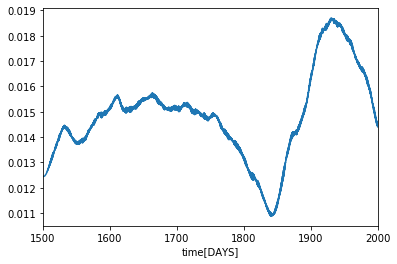

In [58]:
r.stats['KINETIC_ENRG'].plot()

In [59]:
r.params

{'dt': 300.0,
 'theta_s': 5.0,
 'theta_b': 0.0,
 'Hc': 100.0,
 'rho0': 1000.0,
 'y_itide': 400000.0,
 'jet_ywidth': 800000.0,
 'jet_weight': 0.75,
 'omega': 0.000145444104333}

---

## process multiple runs

In [60]:
runs = []
runs += ['jet_cfg1_wp5_4km_0a2000j']
runs += ['jet_cfg1_wp6_4km_0a2000j']
runs += ['jet_cfg1_wp8_4km_0a2000j']
runs += ['jet_cfg1_wp9_4km_0a2000j']
R = [pp.CROCOrun(root_path+run, prefix='file_', open_nc=['ave']) for run in runs]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/zcaspar/jet_cfg1_wp5_4km_0a2000j'

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


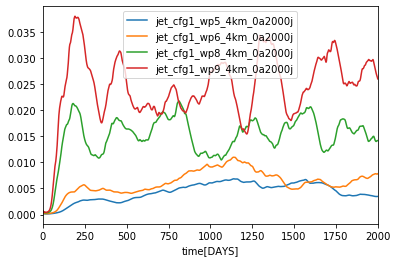

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
for r, cfg in zip(R,runs):
    r.stats['KINETIC_ENRG'].plot(ax=ax, label=cfg)
plt.legend()